In [ ]:
!pip install tonic --quiet
!pip install snntorch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
import tonic
import tonic.transforms as transforms
# from torchvision import datasets, transforms
import torch
import torchvision
import snntorch as snn
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/SNN_Class/STMNIST_Project"

'Copy of Spiking Tactile MNIST.ipynb'   STMNIST
 dylans_visuals.ipynb		        STMNIST_FinalProj.ipynb
'Link to my shit.gdoc'		        STMNISTProjectShato.ipynb
'Spiking Tactile MNIST.ipynb'	        WrapperClass_STMNIST_FinalProj.ipynb


In [ ]:
dataset = tonic.prototype.datasets.STMNIST(root="/content/drive/My Drive/SNN_Class/STMNIST_Project",
                                           keep_compressed = False, shuffle = False)

In [ ]:
events, target = next(iter(dataset))
print(target)

2


In [ ]:
print(len(dataset)) # 23 participants writing 30 times each for 9 digits 23*30*9 = 6210

6953


In [ ]:
# events, target = next(iter(dataset))

In [ ]:
data_list = []
counter = 0
for sample in dataset:
    data_list.append(sample)
    counter += 1
    if counter % 10 == 0:
        print(f"{counter} samples moved over")
    if counter == 100:
        break

10 samples moved over
20 samples moved over
30 samples moved over
40 samples moved over
50 samples moved over
60 samples moved over
70 samples moved over
80 samples moved over
90 samples moved over
100 samples moved over


In [ ]:
events, target = data_list[0]

In [ ]:
# If you're feeling sentimental, you can save the animation: .gif, .mp4 etc.
animation.save("spike_tile_mnist_test.mp4")

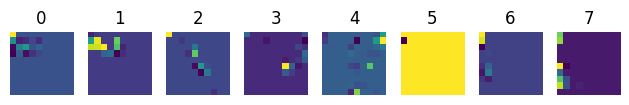

In [ ]:
tonic.utils.plot_event_grid(events, axis_array=(1, 8), plot_frame_number=True)

(15, 2, 10, 10)
1.0
0.0
5


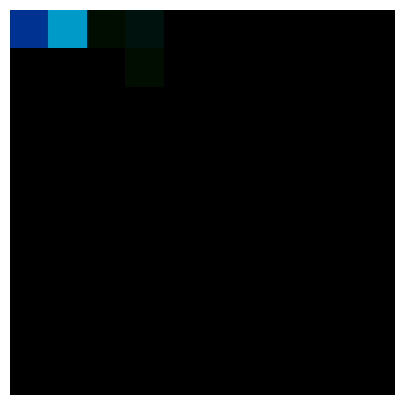

In [ ]:
frame_transform = transforms.Compose([transforms.Denoise(filter_time=100000),
                                      transforms.ToFrame(sensor_size=(10,10,2),
                                                         time_window=10000)
                                     ])

transform = tonic.transforms.ToFrame(
    sensor_size=(10, 10, 2),
    time_window=100000,
)

frames = transform(events)

frames = frames / np.max(frames)

print(frames.shape)

frames = np.rot90(frames, k=-1, axes=(2, 3))
frames = np.flip(frames, axis=3)

# frames_rotated = torchvision.transforms.functional.rotate(frames, angle=90)

# frames = frames.astype(np.uint8)

print(np.max(frames))
print(np.min(frames))

# print(frames[0])
print(target)
animation = tonic.utils.plot_animation(frames)

# Display the animation inline in a Jupyter notebook
from IPython.display import HTML
HTML(animation.to_jshtml())

sensor_size is (10,10,2) for STMNIST

In [ ]:
transform = frame_transform(events)
transform = np.rot90(transform, k=-1, axes=(2, 3))
transform = np.flip(transform, axis=3)
transform = torch.from_numpy(transform)
# print(transform)

In [ ]:
print(transform.shape)
print(transform.size())
print(transform.size(0))

torch.Size([159, 2, 10, 10])
torch.Size([159, 2, 10, 10])
159


torch.Size([159, 200])


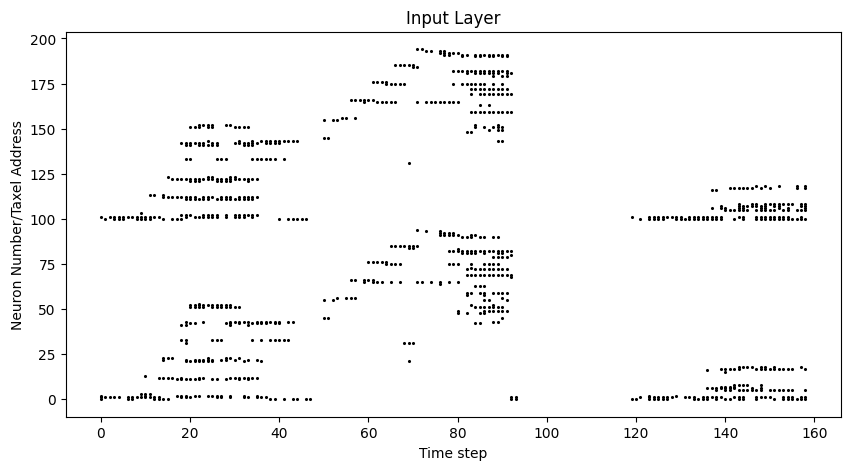

In [ ]:
num_steps = transform.size(0)
# Reshape
transform_plot = transform.reshape((num_steps, -1))
print(transform_plot.size())
# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(transform_plot, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number/Taxel Address")
plt.show()

In [ ]:
# Split the tensor into two tensors of size [124, 1, 10, 10]
# Split the tensor using array indexing
tensor1 = transform[:, 0:1, :, :]
tensor2 = transform[:, 1:2, :, :]

print("Original Tensor Size:", transform.shape)
print("Tensor 1 Size:", tensor1.shape)
print("Tensor 2 Size:", tensor2.shape)

Original Tensor Size: torch.Size([159, 2, 10, 10])
Tensor 1 Size: torch.Size([159, 1, 10, 10])
Tensor 2 Size: torch.Size([159, 1, 10, 10])


In [ ]:
print('tensor1 max', tensor1.max())
print('tensor1 min', tensor1.min())
print('tensor2 max', tensor2.max())
print('tensor2 min',tensor2.min())

tensor1 max tensor(9, dtype=torch.int16)
tensor1 min tensor(0, dtype=torch.int16)
tensor2 max tensor(11, dtype=torch.int16)
tensor2 min tensor(0, dtype=torch.int16)


torch.Size([159, 100])


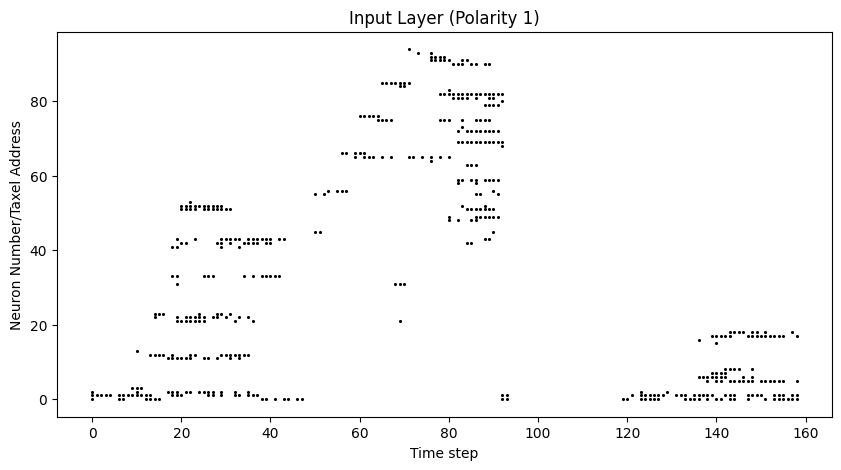

In [ ]:
num_steps = tensor1.size(0)
# Reshape
tensor1_plot = tensor1.reshape((num_steps, -1))
print(tensor1_plot.size())
# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(tensor1_plot, ax, s=1.5, c="black")

plt.title("Input Layer (Polarity 1)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number/Taxel Address")
plt.show()

torch.Size([159, 100])


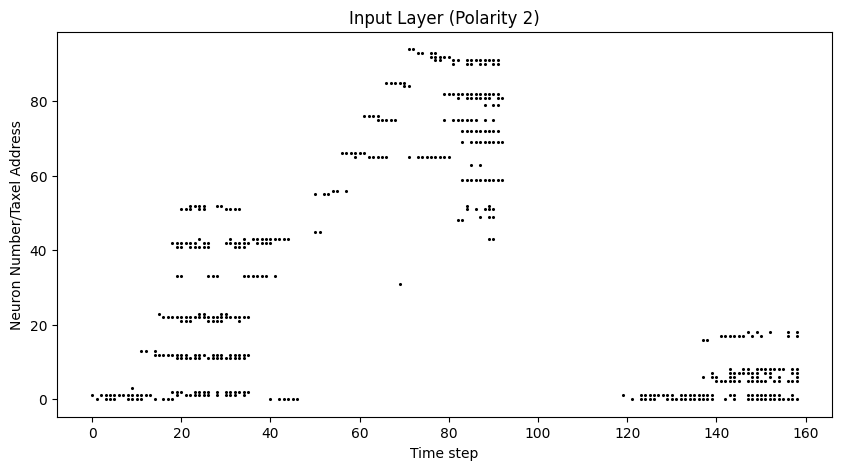

In [ ]:
# Reshape
tensor2_plot = tensor2.reshape((num_steps, -1))
print(tensor2_plot.size())
# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(tensor2_plot, ax, s=1.5, c="black")

plt.title("Input Layer (Polarity 2)")
plt.xlabel("Time step")
plt.ylabel("Neuron Number/Taxel Address")
plt.show()

5


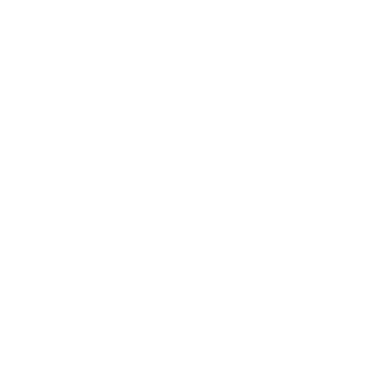

In [ ]:
fig, ax = plt.subplots()
time_steps = tensor1.size(0)
tensor1_plot = tensor1.reshape(time_steps, 10, 10)
anim = splt.animator(tensor1_plot, fig, ax, interval=10)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

print(target)
HTML(anim.to_html5_video())

5


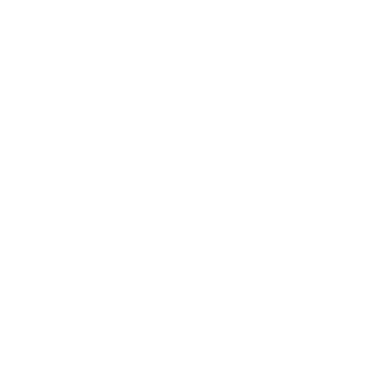

In [ ]:
fig, ax = plt.subplots()
time_steps = tensor2.size(0)
tensor2_plot = tensor2.reshape(time_steps, 10, 10)
anim = splt.animator(tensor2_plot, fig, ax, interval=10)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

print(target)
HTML(anim.to_html5_video())

In [ ]:
transformed_dataset = []

counter = 0
for sample in dataset:
    events = sample[0]
    target = sample[1]

    # Find unique time steps
    time_steps = sorted(set(item[2] for item in events))
    # print(time_steps)

    # Define matrix dimensions (assuming a fixed grid size, adjust as needed)
    grid_size = (9, 9)

    # Initialize an empty tensor to store the matrices
    matrices = []

    for time_step in time_steps:
        # Create an empty matrix filled with zeros
        matrix = torch.zeros(grid_size)

        # Fill the matrix with polarity values
        for item in events:
            x, y, t, p = item
            if t == time_step:
                matrix[y-1][x-1] = p
                # if p == 1:
                #     matrix[y-1][x-1] = p
                # else:
                #     matrix[y-1][x-1] = 1

        matrices.append(matrix)

    # Stack the matrices to form a tensor
    tensor_of_matrices = torch.stack(matrices)

    # # Print the resulting tensor
    # print(tensor_of_matrices[0])

    transformed_dataset.append((tensor_of_matrices, target))

    counter += 1
    if counter % 1 == 0:
        print(f"Tensor {counter} is done!")
    if counter == 10:
        break

Tensor 1 is done!
Tensor 2 is done!
Tensor 3 is done!
Tensor 4 is done!
Tensor 5 is done!
Tensor 6 is done!
Tensor 7 is done!
Tensor 8 is done!
Tensor 9 is done!
Tensor 10 is done!


<class 'torch.Tensor'>
1


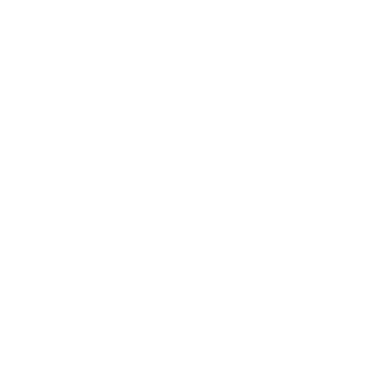

In [ ]:
spike_data_sample, target = transformed_dataset[1]
fig, ax = plt.subplots()
print(type(spike_data_sample))
spike_data_sample = spike_data_sample.transpose(1, 2)
anim = splt.animator(spike_data_sample, fig, ax, interval=5)
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

print(target)
HTML(anim.to_html5_video())

torch.Size([168, 81])


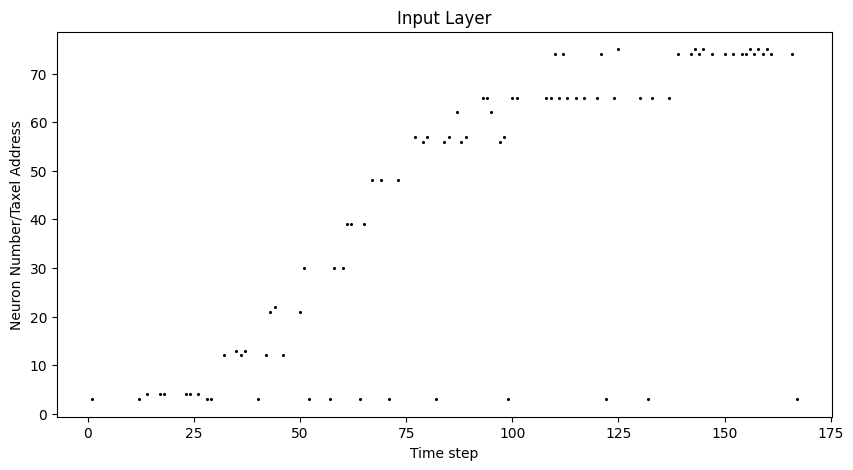

In [ ]:
num_steps = spike_data_sample.size(0)
# Reshape
spike_plot = spike_data_sample.reshape((num_steps, -1))
print(spike_plot.size())
# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_plot, ax, s=1.5, c="black")

plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number/Taxel Address")
plt.show()

In [ ]:
spike_data_sample.shape

torch.Size([168, 9, 9])

In [ ]:
transform.shape

torch.Size([159, 2, 10, 10])